# Used Car Price Prediction 

## importing libraries and modules 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

import tqdm


import warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

from xgboost import XGBRegressor,plot_importance
from lightgbm import LGBMRegressor


from sklearn.model_selection import cross_val_score,train_test_split,cross_validate
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_log_error,r2_score




## Missing Value Imputation

### Reading Data 

In [3]:
car_data = pd.read_csv('vehicles.csv')

In [4]:
car_data.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

### removing redundent featureas

In [6]:
red_feats = ["id",'url','region_url','VIN','image_url','description','county','state','posting_date']
car_df = car_data.copy()
car_df = car_df.drop(columns=red_feats)

In [7]:
car_df = car_df.sample(frac=0.4)

In [8]:
car_df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
85715,hartford,4899,2008.0,honda,odyssey,NaN,6 cylinders,gas,209009.0,clean,automatic,NaN,NaN,NaN,NaN,41.834100,-72.557600
285697,new hampshire,99,2018.0,chevrolet,silverado 1500,NaN,NaN,other,59303.0,clean,automatic,4wd,full-size,NaN,green,43.244000,-71.410500
242415,raleigh / durham / CH,24590,2019.0,chrysler,300 touring l sedan 4d,good,6 cylinders,gas,15557.0,clean,other,rwd,NaN,sedan,black,35.820000,-78.650000
107785,pensacola,35999,2019.0,ford,ranger xlt,NaN,NaN,gas,2665.0,clean,automatic,NaN,NaN,NaN,NaN,29.803261,-82.529945
219073,north mississippi,14272,2015.0,toyota,sienna,NaN,NaN,other,95271.0,clean,automatic,fwd,NaN,van,blue,34.758445,-88.940087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70145,yuba-sutter,9988,2014.0,ford,escape,NaN,NaN,gas,129175.0,clean,automatic,fwd,NaN,SUV,silver,38.739933,-121.290932
226667,eastern montana,37901,2016.0,gmc,yukon xl,excellent,8 cylinders,gas,114800.0,clean,automatic,4wd,full-size,SUV,black,44.087450,-103.198130
62372,SF bay area,30995,2019.0,chevrolet,silverado 1500,like new,8 cylinders,gas,7835.0,clean,automatic,NaN,NaN,NaN,white,37.313775,-122.032571
27517,fresno / madera,27999,2013.0,toyota,tundra,NaN,8 cylinders,gas,91000.0,clean,automatic,4wd,NaN,truck,grey,38.614287,-121.270495


###  Checking missing values

In [9]:
car_df.isna().sum()

region               0
price                0
year               480
manufacturer      7098
model             2128
condition        69516
cylinders        71219
fuel              1220
odometer          1766
title_status      3262
transmission      1020
drive            52116
size            122446
type             37090
paint_color      52025
lat               2651
long              2651
dtype: int64

<Axes: >

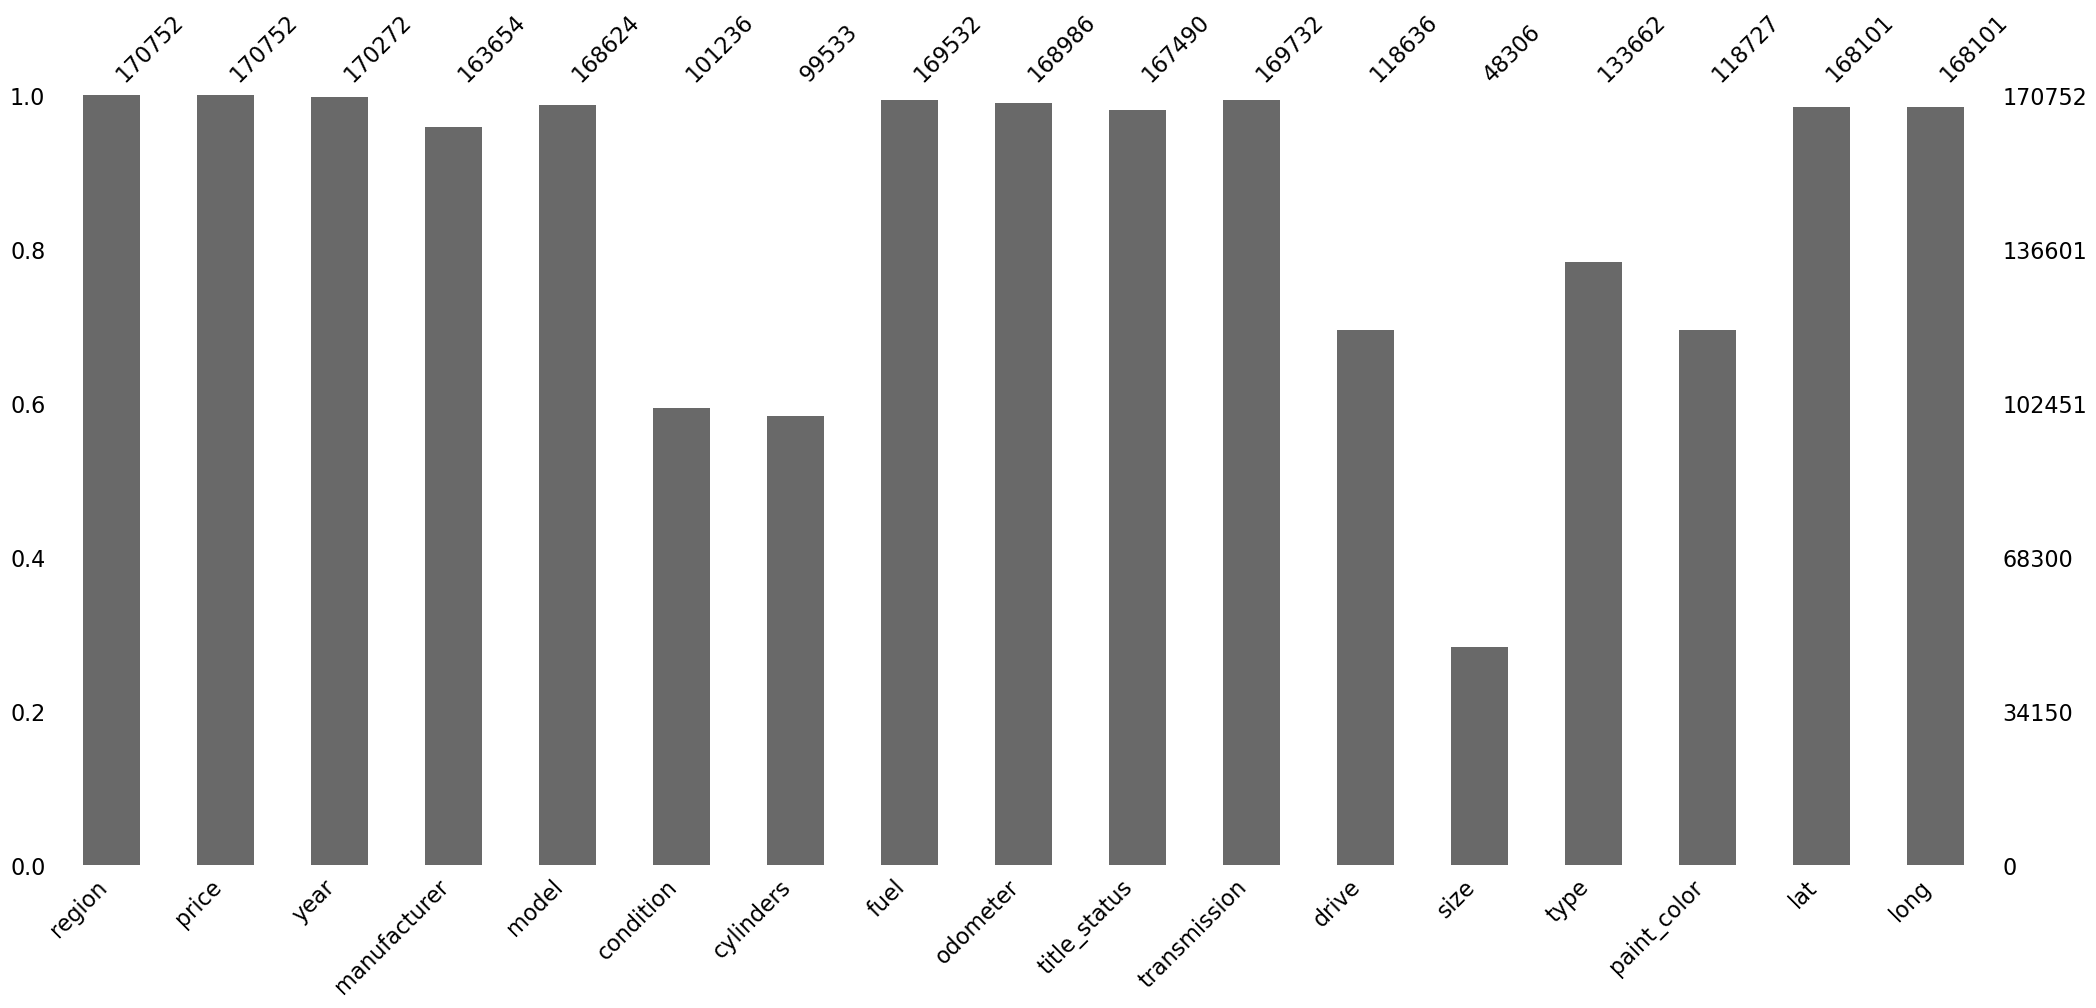

In [10]:
# plt.figure(figsize=(5,5))
msno.bar(car_df)

In [5]:
numeric_cols=['year','odometer','lat','long']
categorical_cols =['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']


### handling missing values 

In [12]:
car_df_copy = car_df.copy()
#object of LabelEncoder
encoder=LabelEncoder()

#function to label the categorical columns ignoring null values 
def encode(data):
    
    notnull = np.array(data.dropna())
    notnull_reshape = notnull.reshape(-1,1)
    ordinal_encoder = encoder.fit_transform(notnull_reshape)
    data.loc[data.notnull()] = np.squeeze(ordinal_encoder)
    return data
    

#loop for apply lable encoding to each categorical columns 
for i in tqdm.tqdm(range(len(categorical_cols))):
    encode(car_df_copy[categorical_cols[i]])

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 12.57it/s]


In [13]:
car_df_copy

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
85715,137,4899,2008.0,16,12655,NaN,5,2,209009.0,0,0,NaN,NaN,NaN,NaN,41.834100,-72.557600
285697,231,99,2018.0,7,15170,NaN,NaN,4,59303.0,0,0,0,1,NaN,4,43.244000,-71.410500
242415,282,24590,2019.0,8,1343,2,5,2,15557.0,0,2,2,NaN,9,0,35.820000,-78.650000
107785,266,35999,2019.0,13,13781,NaN,NaN,2,2665.0,0,0,NaN,NaN,NaN,NaN,29.803261,-82.529945
219073,240,14272,2015.0,39,14814,NaN,NaN,4,95271.0,0,0,1,NaN,11,1,34.758445,-88.940087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70145,401,9988,2014.0,13,7950,NaN,NaN,2,129175.0,0,0,1,NaN,0,9,38.739933,-121.290932
226667,92,37901,2016.0,14,18256,0,6,2,114800.0,0,0,0,1,0,0,44.087450,-103.198130
62372,0,30995,2019.0,7,15170,3,6,2,7835.0,0,0,NaN,NaN,NaN,10,37.313775,-122.032571
27517,119,27999,2013.0,39,17130,NaN,6,2,91000.0,0,0,0,NaN,10,5,38.614287,-121.270495


In [14]:
car_df_copy.sample(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
143168,208,39990,2019.0,31,1657,2,5,2,8373.0,0,2,2,NaN,3,10,39.470000,-88.360000
392477,200,43590,2016.0,3,14461,2,6,2,52366.0,0,2,NaN,NaN,9,NaN,37.400000,-79.190000
119413,362,2500,1999.0,5,13957,NaN,NaN,2,100000.0,0,0,NaN,NaN,NaN,NaN,27.309400,-80.345000
81140,279,10200,1995.0,13,12379,3,6,2,70000.0,0,0,NaN,1,3,10,38.271500,-104.611800
379802,251,34785,2014.0,13,9212,NaN,NaN,0,205730.0,0,0,NaN,NaN,NaN,NaN,30.648368,-97.866211


In [15]:
car_df_copy['price'].copy()

85715      4899
285697       99
242415    24590
107785    35999
219073    14272
          ...  
70145      9988
226667    37901
62372     30995
27517     27999
334594    12112
Name: price, Length: 170752, dtype: int64

In [16]:
try_estimator = BayesianRidge() 
cv = 6  

score_simple_imputer = pd.DataFrame()
#computing MSE for mean and median
for strategy in tqdm.tqdm(('mean', 'median')):
    X=car_df_copy.drop(columns=['price']).copy()
    y = np.ravel(car_df_copy['price'].copy())
    estimator = make_pipeline(
        SimpleImputer(strategy=strategy),
        try_estimator
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X, y, scoring='neg_mean_squared_error',
        cv=cv
    )

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.43s/it]


In [17]:
score_simple_imputer.astype(str)

,mean,median
0,-34274733255497.027,-34274733212015.95
1,-357176388041.47906,-357176426204.44806
2,-991461064711.5658,-991461147191.7299
3,-53577613168150.7,-53577613074527.9
4,-365544301839042.56,-365544302242861.8
5,-321531900272634.75,-321531900009397.56


In [18]:
car_df_copy.isnull().sum()

region               0
price                0
year               480
manufacturer      7098
model             2128
condition        69516
cylinders        71219
fuel              1220
odometer          1766
title_status      3262
transmission      1020
drive            52116
size            122446
type             37090
paint_color      52025
lat               2651
long              2651
dtype: int64

In [56]:
imputer = IterativeImputer(BayesianRidge())
df_new=car_df_copy.copy().reset_index(drop=True)
for col in car_df_copy.columns:
        #col=check_imputer.columns[i]
        impute_data=imputer.fit_transform(df_new[col].values.reshape(-1,1))
        impute_data=impute_data.astype('int64')
        impute_data = pd.DataFrame(np.ravel(impute_data))
        df_new[col]=impute_data
        

# imputer.fit_transform(df_new['condition'].values.reshape(-1,1))
# col='condition'
# impute_data=imputer.fit_transform(df_new[col].values.reshape(-1,1))
# impute_data=impute_data.astype('int64')
# impute_data = pd.DataFrame(np.ravel(impute_data))

# impute_data

In [58]:
df_new.isna().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
lat             0
long            0
dtype: int64

In [51]:
x = df_new.reset_index(drop=True)
x['condition'] = impute_data.loc[:,0]


region               0
price                0
year               480
manufacturer      7098
model             2128
condition            0
cylinders        71219
fuel              1220
odometer          1766
title_status      3262
transmission      1020
drive            52116
size            122446
type             37090
paint_color      52025
lat               2651
long              2651
dtype: int64

In [43]:
df_new.condition

85715     NaN
285697    NaN
242415      2
107785    NaN
219073    NaN
         ... 
70145     NaN
226667      0
62372       3
27517     NaN
334594    NaN
Name: condition, Length: 170752, dtype: object

0         1
1         1
2         2
3         1
4         1
         ..
170747    1
170748    0
170749    3
170750    1
170751    1
Name: 0, Length: 170752, dtype: int64

In [44]:

df_new['condition'] = impute_data.loc[:,0]

In [46]:
df_new.condition


85715     0.0
285697    NaN
242415    NaN
107785    0.0
219073    NaN
         ... 
70145     2.0
226667    NaN
62372     1.0
27517     0.0
334594    NaN
Name: condition, Length: 170752, dtype: float64

In [59]:
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=111),
    ExtraTreesRegressor(n_estimators=10, random_state=111),
    KNeighborsRegressor(n_neighbors=15,n_jobs=-1)
]
score_iterative_imputer = pd.DataFrame()
for esti in tqdm.tqdm(estimators):
        print("Estimating",esti.__class__.__name__)
        imputer = IterativeImputer(esti)
        df_new=car_df_copy.copy().reset_index(drop=True)
        for col in car_df_copy.columns:
            #col=check_imputer.columns[i]
            impute_data=imputer.fit_transform(df_new[col].values.reshape(-1,1))
            impute_data=impute_data.astype('int64')
            impute_data = pd.DataFrame(np.ravel(impute_data))
            df_new[col]=impute_data
        X = df_new.drop(columns=['price']).copy()
        y = df_new['price'].copy()

        score_iterative_imputer[esti.__class__.__name__] =           cross_val_score(esti,X,y,scoring='neg_mean_squared_error')
        


  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

Estimating BayesianRidge


 25%|█████████████████████                                                               | 1/4 [00:01<00:05,  1.68s/it]

Estimating DecisionTreeRegressor


 50%|██████████████████████████████████████████                                          | 2/4 [00:05<00:06,  3.08s/it]

Estimating ExtraTreesRegressor


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:54<00:23, 23.93s/it]

Estimating KNeighborsRegressor


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [22:28<00:00, 337.03s/it]


In [60]:
score_iterative_imputer

,BayesianRidge,DecisionTreeRegressor,ExtraTreesRegressor,KNeighborsRegressor
0,-2.885528e+13,-2.886520e+13,-4.069273e+13,-4.032615e+13
1,-6.722663e+09,-1.368241e+15,-2.964747e+14,-2.521813e+13
2,-8.357973e+11,-8.319286e+11,-1.250536e+13,-7.949772e+12
3,-3.131073e+14,-3.137907e+14,-3.192674e+14,-2.845358e+14
4,-3.040890e+14,-3.046359e+14,-3.327936e+14,-3.079259e+14


<Axes: >

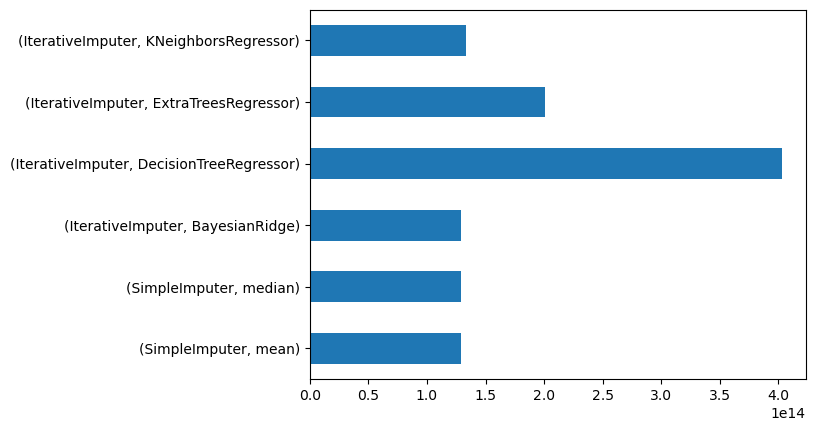

In [61]:
scores = pd.concat([score_simple_imputer,score_iterative_imputer],
         keys=['SimpleImputer', 'IterativeImputer'], axis=1
)


scores.mean().abs().plot.barh(scores.std())


In [ ]:
scores.astype(str)

In [ ]:
scores.mean()

#### Filling null values




#####  For numerical columns 

In [63]:
car_df.isnull().sum()[numeric_cols]

year         480
odometer    1766
lat         2651
long        2651
dtype: int64

In [68]:
num_data = car_df[numeric_cols]
num_imputer = IterativeImputer(BayesianRidge())
impute_data = num_imputer.fit_transform(num_data)
car_df[numeric_cols] = impute_data

In [69]:
car_df.isnull().sum()[numeric_cols]

year        0
odometer    0
lat         0
long        0
dtype: int64

##### for categorical columns

In [71]:
cat_data = car_df[categorical_cols]
encoder=LabelEncoder()

#create a for loop to iterate through each column in the data
for columns in categorical_cols:
    encode(cat_data[columns])
    imputer = IterativeImputer(BayesianRidge())
    impute_data=imputer.fit_transform(cat_data[columns].values.reshape(-1, 1))
    impute_data=impute_data.astype('int64')
    impute_data = pd.DataFrame(impute_data)
    impute_data =encoder.inverse_transform(impute_data.values.reshape(-1, 1))
    cat_data[columns]=impute_data
car_df[categorical_cols]=cat_data    

In [73]:
car_df.isna().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
lat             0
long            0
dtype: int64

### handling outliers

In [11]:
car_stats = car_df[numeric_cols+['price']].describe().copy().T

In [14]:
q1 = car_stats['25%']
q2 = car_stats['50%']
q3 = car_stats['75%']
IQR = q3 - q1

car_stats['LF'] = q1 - 1.5*IQR
car_stats['HF'] = q3 + 1.5*IQR



In [67]:
car_df_clean.price = np.log(car_df_clean.price)

In [68]:
car_stats = car_df_clean[numeric_cols+['price']].describe().copy().T
q1 = car_stats['25%']
q2 = car_stats['50%']
q3 = car_stats['75%']
IQR = q3 - q1

car_stats['LF'] = q1 - 1.5*IQR
car_stats['HF'] = q3 + 1.5*IQR



In [69]:
car_stats

,count,mean,std,min,25%,50%,75%,max,LF,HF
year,147502.0,2012.534896,5.468122,1995.000000,2009.000000,2014.000000,2017.000000,2022.000000,1997.000000,2029.000000
odometer,147502.0,91560.202280,60636.901128,0.000000,38486.250000,87306.500000,134855.000000,275515.000000,-106066.875000,279408.125000
lat,147502.0,38.454383,5.232435,24.555200,34.830000,39.179138,42.334900,52.716830,23.572650,53.592250
long,147502.0,-93.446439,16.626320,-126.351147,-106.944340,-87.864796,-80.705172,-67.143300,-146.303092,-41.346419
price,147502.0,9.430988,1.237462,0.000000,8.921991,9.660715,10.239603,21.830158,6.945575,12.216019


In [22]:
# for Year 

lf,hf = car_stats.loc['year',['LF',"HF"]].astype(int)

car_df = car_df.query('year > @lf and year < @hf')

In [23]:
# for odometer
lf,hf = car_stats.loc['odometer',['LF',"HF"]].astype(int)

car_df = car_df.query('odometer > @lf and odometer < @hf')

In [25]:
# for lat and long columns
lf,hf = car_stats.loc['lat',['LF',"HF"]].astype(int)

car_df = car_df.query('lat > @lf and lat < @hf')

lf,hf = car_stats.loc['long',['LF',"HF"]].astype(int)

car_df = car_df.query('long > @lf and long < @hf')


In [75]:
# for price
car_df = car_df.query('price != 0')
car_df['log_price'] = np.log(car_df.price)

q1 = car_df.price.quantile(0.25)
q2 = car_df.price.quantile(0.50)
q3 = car_df.price.quantile(0.75)

IQR = q3-q1

lf = q1 - 1.5*IQR
hf = q3 + 1.5*IQR

car_df = car_df.query('log_price > @lf and log_price < @hf')
car_df.drop(columns=['log_price'],inplace=True)

In [101]:
car_df_clean.describe()

,price,year,odometer,lat,long,log_price
count,142021.000000,142021.000000,142021.000000,142021.000000,142021.000000,142021.000000
mean,19780.005710,2012.514968,91926.598352,38.436633,-93.302221,9.593272
std,14846.867156,5.445436,60652.384310,5.195073,16.496970,0.827933
min,1195.000000,1995.000000,0.000000,24.555200,-126.351147,7.085901
25%,7995.000000,2009.000000,38705.000000,34.892100,-106.578100,8.986572
50%,16000.000000,2014.000000,87976.000000,39.145315,-87.820874,9.680344
75%,28460.000000,2017.000000,135198.000000,42.295383,-80.671062,10.256255
max,179999.000000,2022.000000,275515.000000,52.716830,-67.143300,12.100707


In [102]:
car_df.to_csv("cleaned_data_32.csv",index=False)

## Data visulization 

In [103]:
car_df_clean = pd.read_csv("cleaned_data_32.csv")

In [104]:
car_df_clean.describe().astype(str)

,price,year,odometer,lat,long,log_price
count,142021.0,142021.0,142021.0,142021.0,142021.0,142021.0
mean,19780.005710423105,2012.5149676270005,91926.59835236146,38.43663325184573,-93.30222090599264,9.593272147739674
std,14846.867156411543,5.445435575685241,60652.3843097647,5.195072690404809,16.496970276920788,0.8279328489483015
min,1195.0,1995.0,0.0,24.5552,-126.351147,7.085901464365611
25%,7995.0,2009.0,38705.0,34.8921,-106.5781,8.986571625268054
50%,16000.0,2014.0,87976.0,39.145315,-87.820874,9.680344001221918
75%,28460.0,2017.0,135198.0,42.295383,-80.671062,10.256254871643844
max,179999.0,2022.0,275515.0,52.71683,-67.1433,12.10070657430136


In [105]:
car_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142021 entries, 0 to 142020
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        142021 non-null  object 
 1   price         142021 non-null  int64  
 2   year          142021 non-null  float64
 3   manufacturer  142021 non-null  object 
 4   model         142021 non-null  object 
 5   condition     142021 non-null  object 
 6   cylinders     142021 non-null  object 
 7   fuel          142021 non-null  object 
 8   odometer      142021 non-null  float64
 9   title_status  142021 non-null  object 
 10  transmission  142021 non-null  object 
 11  drive         142021 non-null  object 
 12  size          142021 non-null  object 
 13  type          142021 non-null  object 
 14  paint_color   142021 non-null  object 
 15  lat           142021 non-null  float64
 16  long          142021 non-null  float64
 17  log_price     142021 non-null  float64
dtypes: f

In [106]:
car_df_clean.year = car_df_clean.year.astype('int')

In [107]:
car_df_clean.shape

(142021, 18)

In [108]:
car_df_clean.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'lat', 'long', 'log_price'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of price')

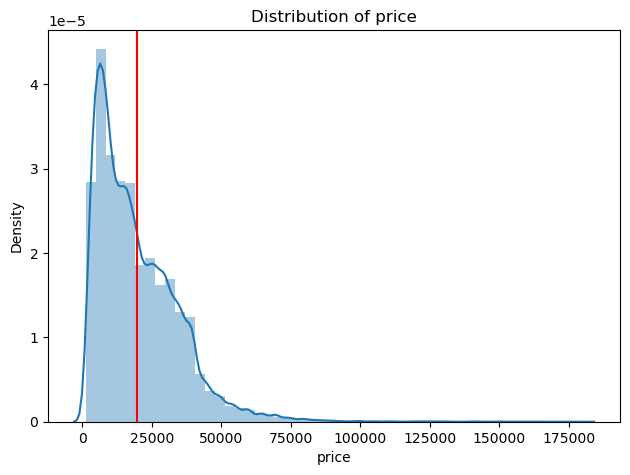

In [109]:
price = car_df_clean.price
sns.distplot(price)
plt.tight_layout()
plt.axvline(price.mean(),c='red')
plt.title("Distribution of price")

In [213]:
car_df_clean.groupby('year').price.count().sort_values().reset_index()

,year,price
0,2022,15
1,1995,406
2,1996,414
3,2021,543
4,1997,580
5,1998,685
6,1999,1032
7,2000,1257
8,2001,1550
9,2002,1946


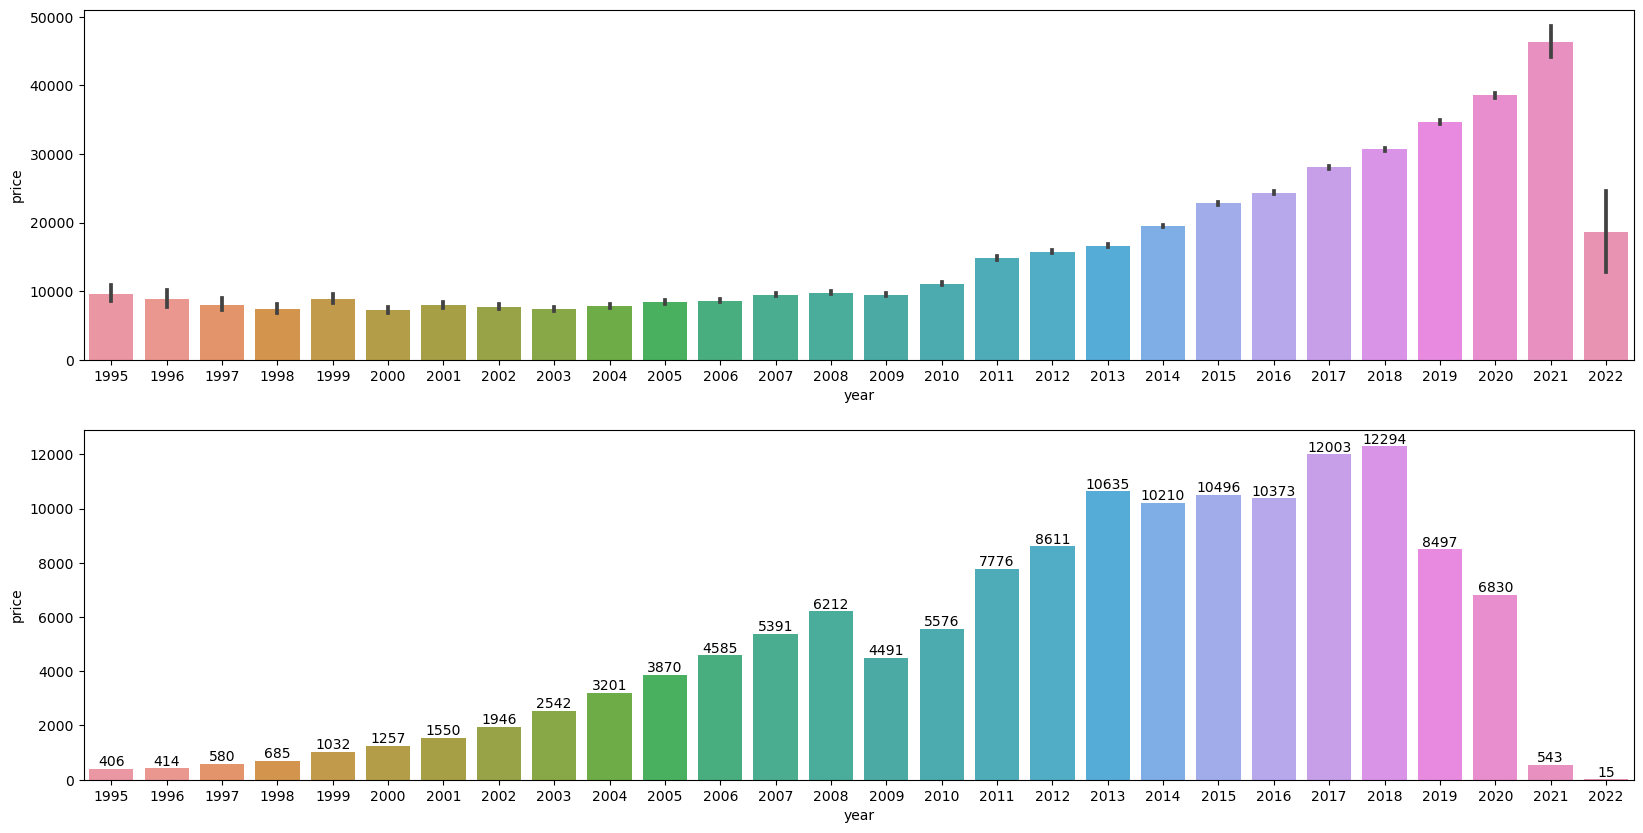

In [214]:
fig,ax = plt.subplots(nrows=2)
# plt.figure(figsize=(20,10))
fig.set_size_inches(20,10)
sns.barplot(data=car_df_clean,x='year',y='price',ax=ax[0])
grby_year = car_df_clean.groupby('year').price.count().sort_values().reset_index()
sns.barplot(data=grby_year,y='price',x='year',ax=ax[1])
ax[1].bar_label(ax[1].containers[0]);

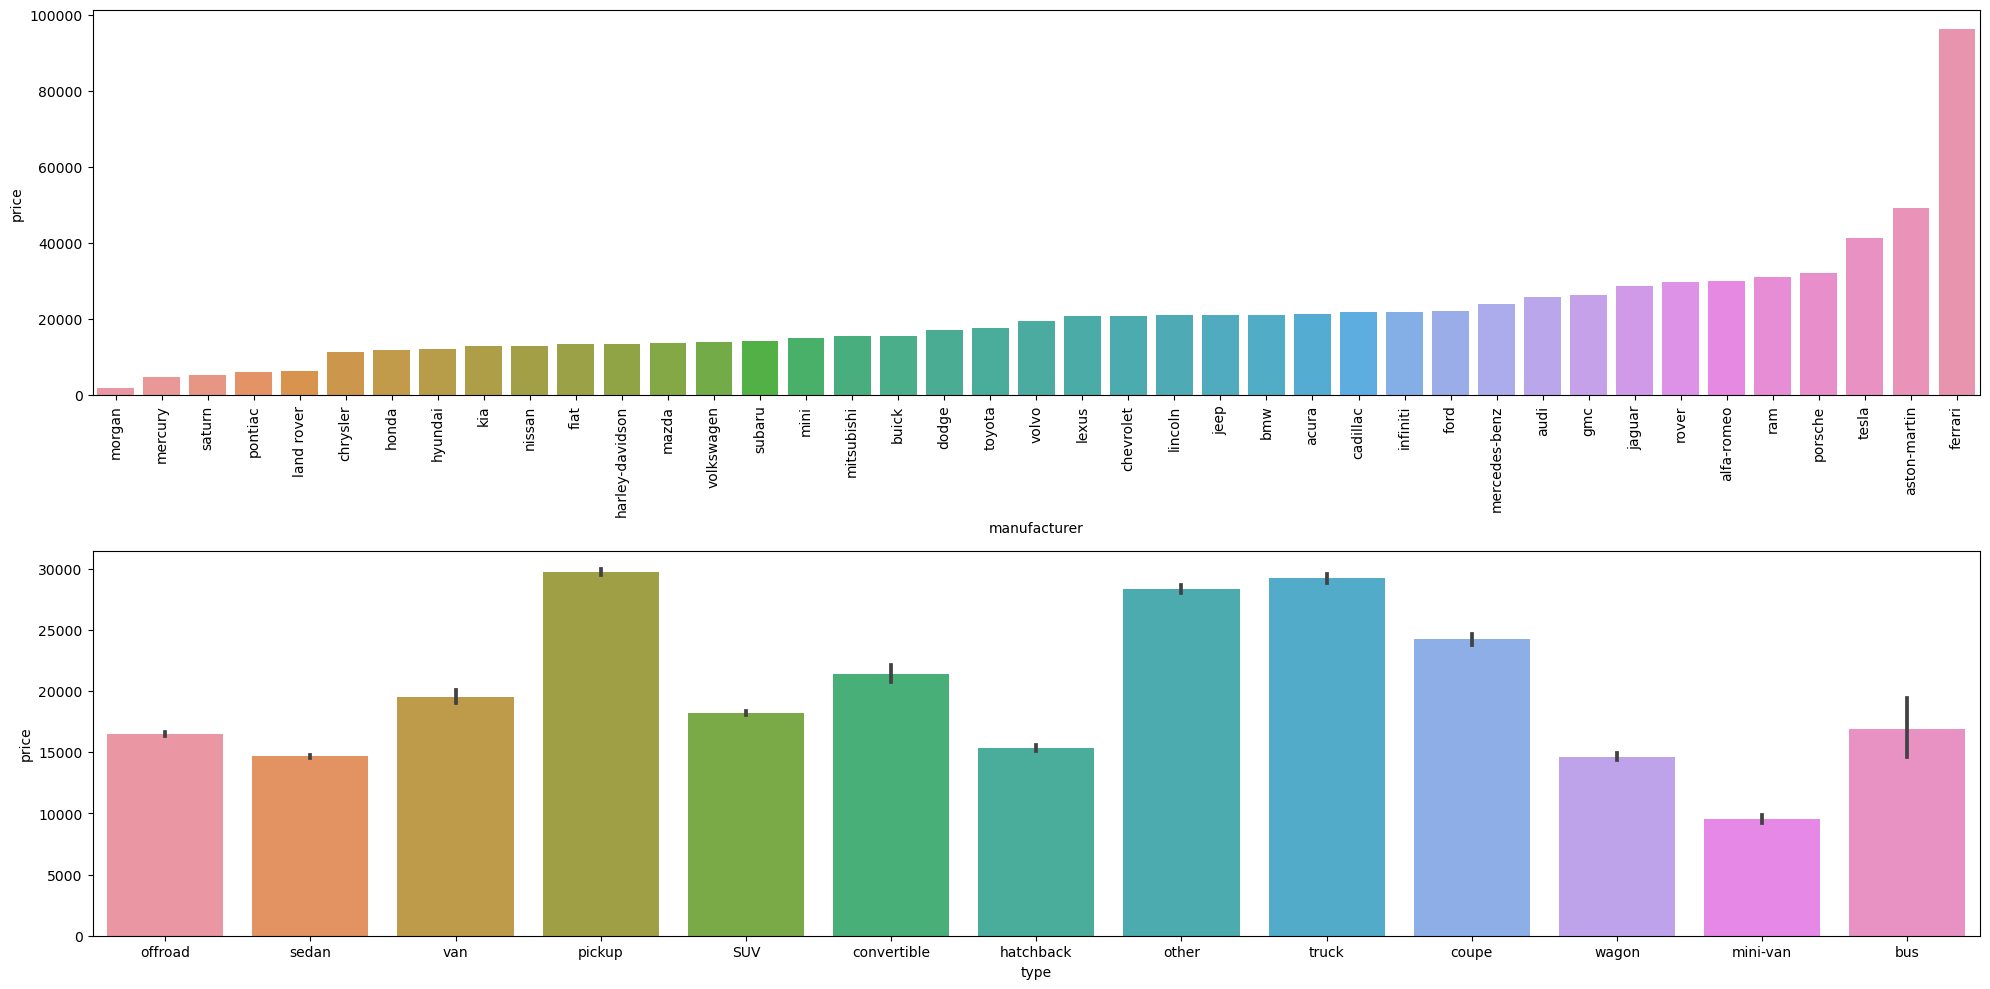

In [224]:
fig,ax = plt.subplots(nrows=2)
fig.set_size_inches(20,10)

# sns.barplot(data=car_df_clean,x='manufacturer',y='price',ax=ax[0])
sns.barplot(data = car_df_clean.groupby('manufacturer').price.mean().sort_values().reset_index(),x='manufacturer',y='price',ax=ax[0])

# ax[0].set_xticklabels(rotation=90)
ax[0].tick_params(axis='x',rotation=90)

sns.barplot(data=car_df_clean,x='type',y='price',ax=ax[1])



fig.tight_layout()

<Axes: xlabel='manufacturer', ylabel='price'>

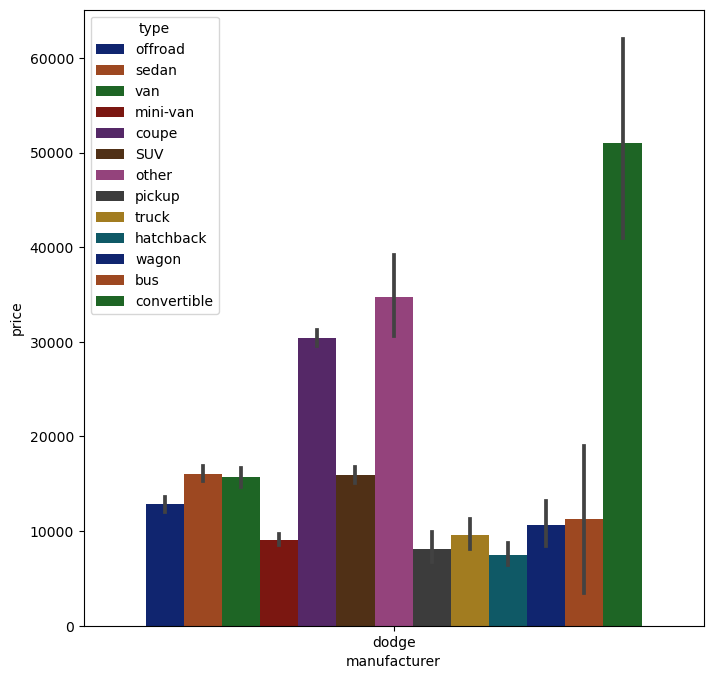

In [164]:
manufacturer = 'dodge'
# type = 'pickup'

df = car_df_clean.query(" manufacturer == @manufacturer")
fig,ax = plt.subplots(nrows=1)
fig.set_size_inches(8,8)
sns.barplot(data=df,x='manufacturer',y='price',hue='type',ax=ax,palette='dark')

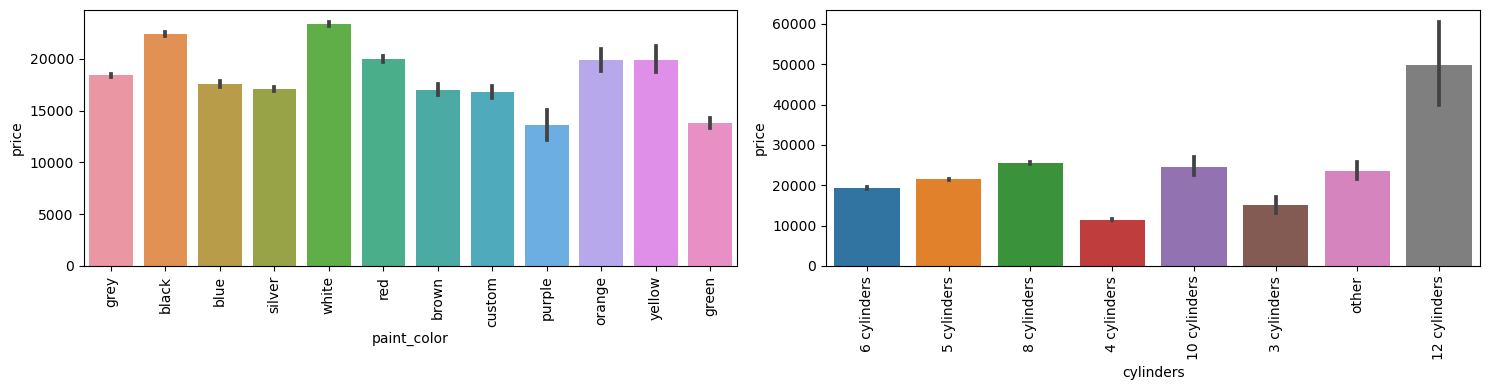

In [230]:
fig,ax=plt.subplots(ncols=2)
fig.set_size_inches(15,4)
sns.barplot(x='paint_color',y='price',data=car_df_clean,ax=ax[0])
ax[0].tick_params(axis='x',rotation=90)
sns.barplot(x='cylinders',y='price',data=car_df_clean,ax=ax[1])
ax[1].tick_params(axis='x',rotation=90)
plt.tight_layout()
plt.show()

In [225]:
car_df_clean

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,log_price
0,hartford,4899,2008,honda,odyssey,fair,6 cylinders,gas,209009.0,clean,automatic,4wd,full-size,offroad,grey,41.834100,-72.557600,8.496786
1,raleigh / durham / CH,24590,2019,chrysler,300 touring l sedan 4d,good,6 cylinders,gas,15557.0,clean,other,rwd,full-size,sedan,black,35.820000,-78.650000,10.110095
2,pensacola,35999,2019,ford,ranger xlt,fair,5 cylinders,gas,2665.0,clean,automatic,4wd,full-size,offroad,grey,29.803261,-82.529945,10.491246
3,north mississippi,14272,2015,toyota,sienna,fair,5 cylinders,other,95271.0,clean,automatic,fwd,full-size,van,blue,34.758445,-88.940087,9.566055
4,tulsa,6464,2013,dodge,dart sxt,fair,5 cylinders,gas,120569.0,clean,manual,4wd,full-size,offroad,grey,35.990820,-95.886354,8.774004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142016,yuba-sutter,9988,2014,ford,escape,fair,5 cylinders,gas,129175.0,clean,automatic,fwd,full-size,SUV,silver,38.739933,-121.290932,9.209140
142017,eastern montana,37901,2016,gmc,yukon xl,excellent,8 cylinders,gas,114800.0,clean,automatic,4wd,full-size,SUV,black,44.087450,-103.198130,10.542733
142018,SF bay area,30995,2019,chevrolet,silverado 1500,like new,8 cylinders,gas,7835.0,clean,automatic,4wd,full-size,offroad,white,37.313775,-122.032571,10.341581
142019,fresno / madera,27999,2013,toyota,tundra,fair,8 cylinders,gas,91000.0,clean,automatic,4wd,full-size,truck,grey,38.614287,-121.270495,10.239924


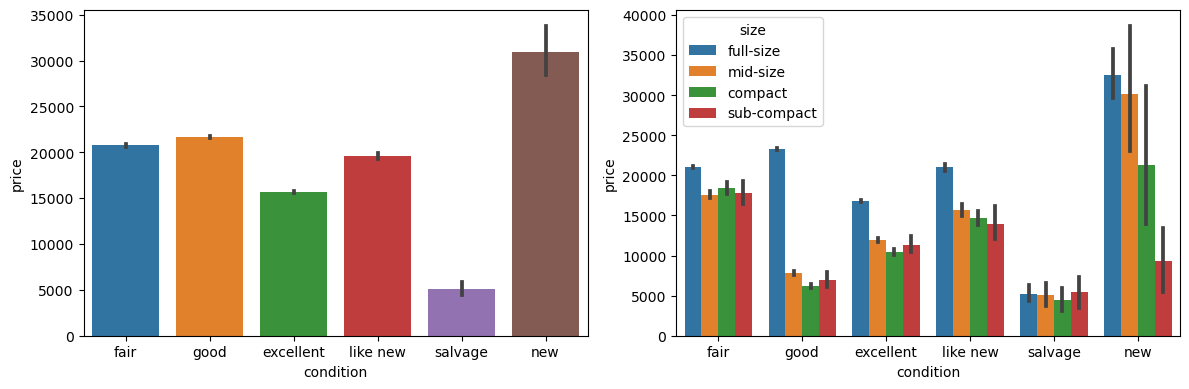

In [231]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='condition',y='price',data=car_df_clean,ax=axs[0])
sns.barplot(x='condition',y='price',hue='size',data=car_df_clean,ax=axs[1])
plt.tight_layout()
plt.show()

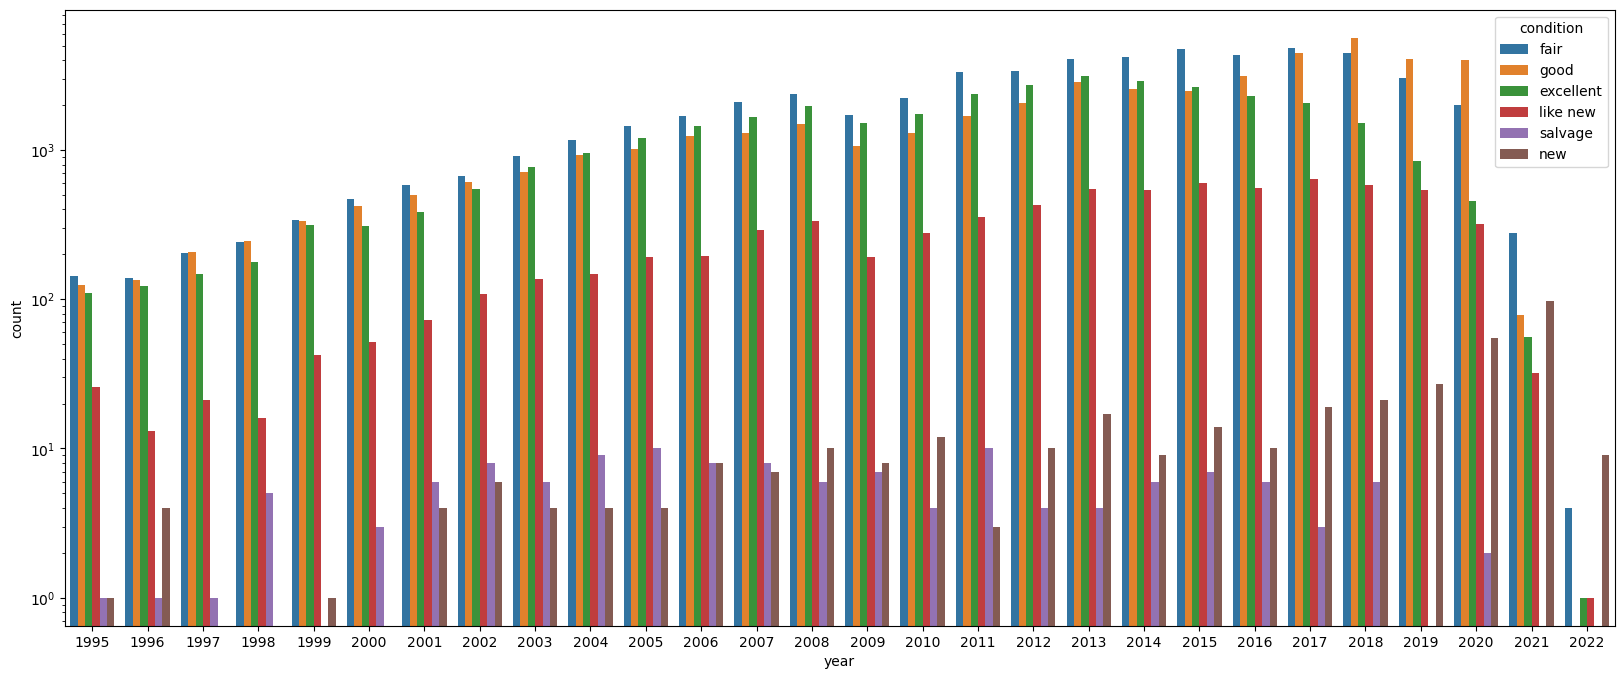

In [208]:
plt.figure(figsize=(20,8))
sns.countplot(data=car_df_clean,x='year',hue='condition')
plt.yscale('log')

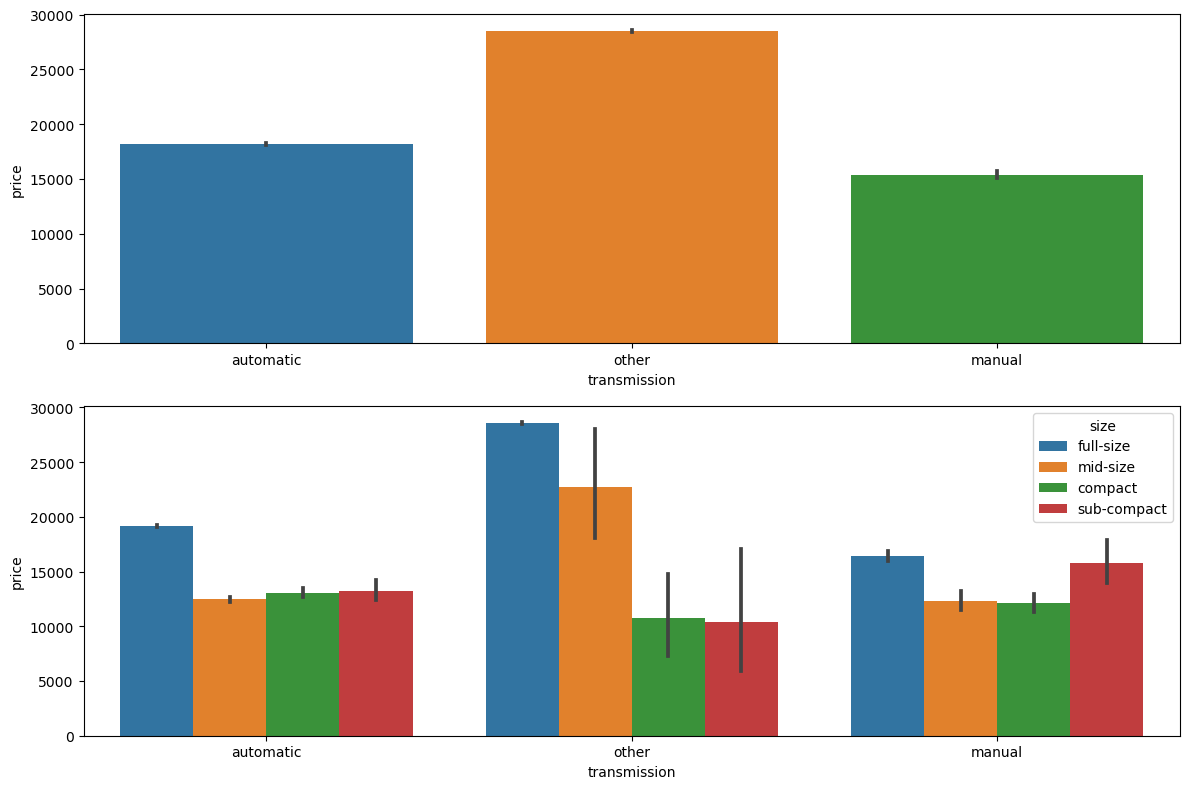

In [179]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(12,8)
sns.barplot(x='transmission',y='price',data=car_df_clean,ax=axs[0])
sns.barplot(x='transmission',y='price',hue='size',data=car_df_clean,ax=axs[1])
plt.tight_layout()
plt.show()

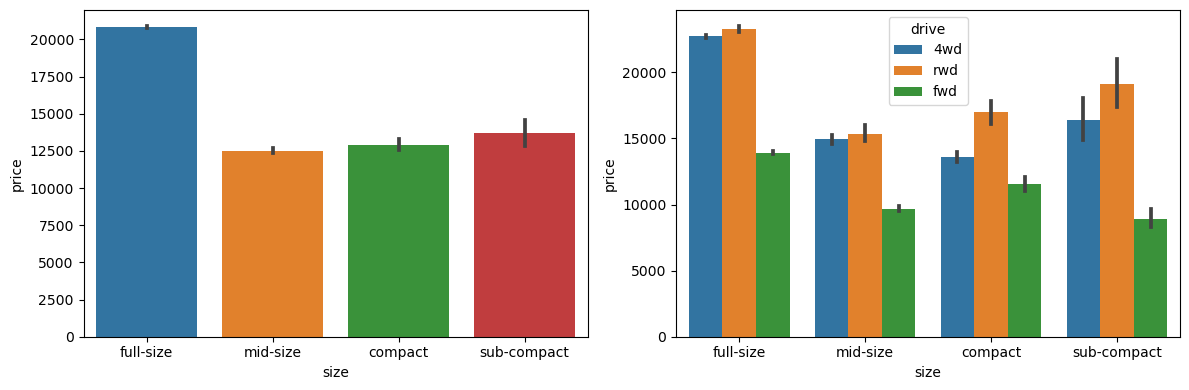

In [180]:

fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='size',y='price',data=car_df_clean,ax=axs[0])
sns.barplot(x='size',y='price',hue='drive',data=car_df_clean,ax=axs[1])
plt.tight_layout()
plt.show()

In [191]:
car_df_clean.transmission.value_counts().reset_index()

,index,transmission
0,automatic,111750
1,other,23813
2,manual,6458


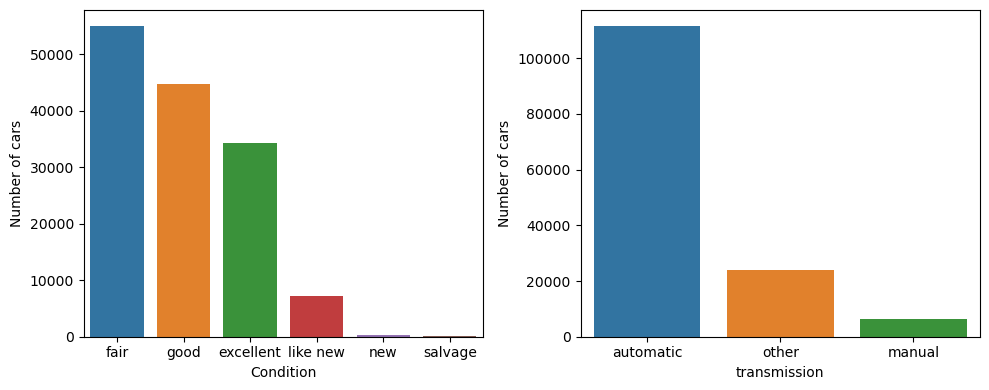

In [193]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(10,4)
sns.barplot(car_df_clean.condition.value_counts().reset_index(),x='index',y='condition',ax=axs[0])
sns.barplot(car_df_clean.transmission.value_counts().reset_index(),x='index',y='transmission',ax=axs[1])
axs[0].set_ylabel('Number of cars')
axs[0].set_xlabel('Condition')
axs[1].set_ylabel('Number of cars')
axs[1].set_xlabel('transmission')
plt.tight_layout()
plt.show()

<Axes: xlabel='long', ylabel='lat'>

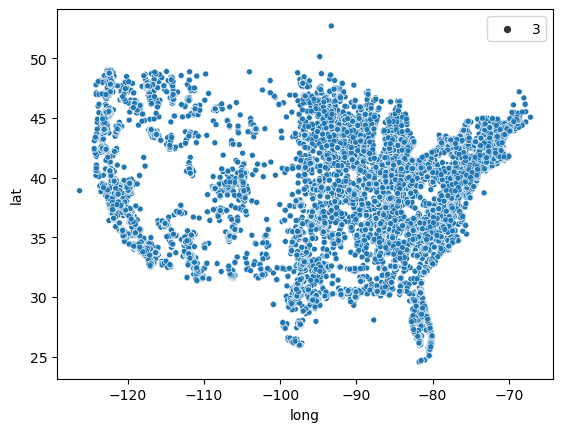

In [240]:
sns.scatterplot(data=car_df_clean,y='lat',x='long',size=3)

(142021, 18)

In [246]:
demo = car_df_clean.sample(frac=0.001)[['price','odometer','year','log_price']]

In [243]:
demo.shape

(142, 18)

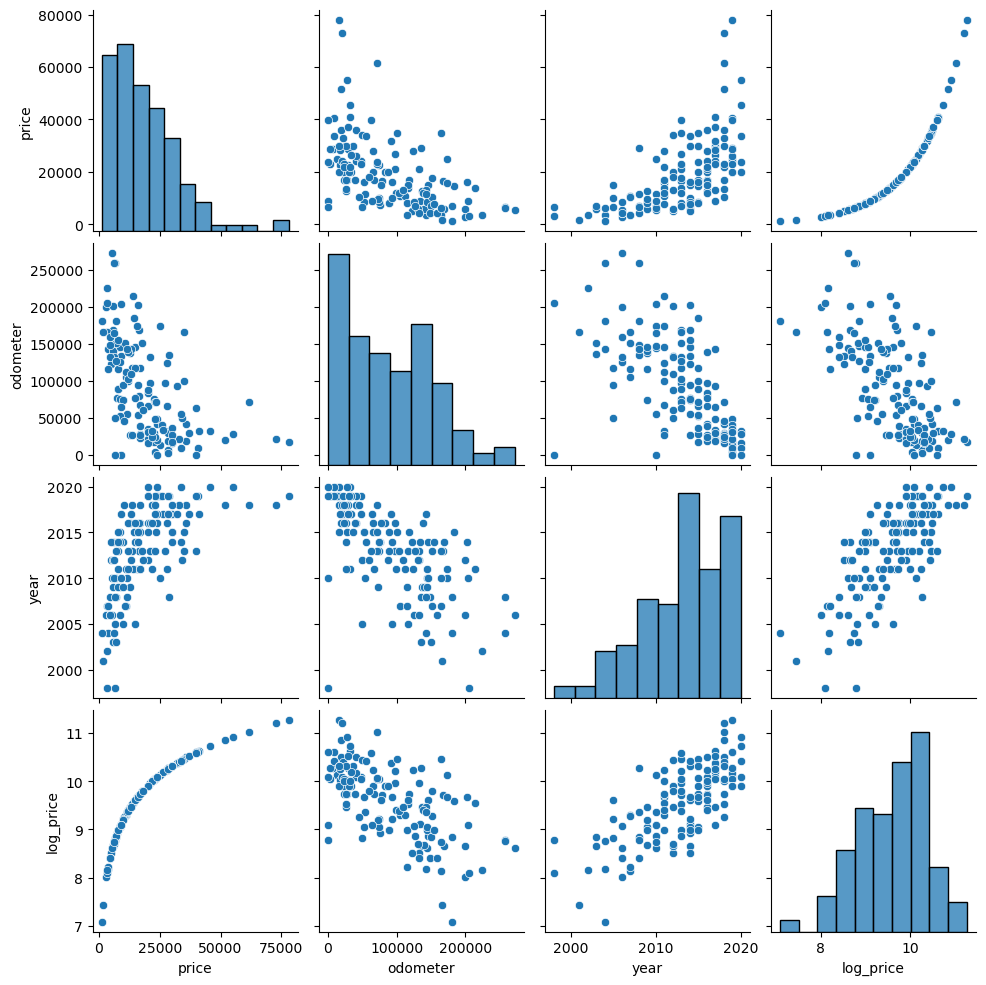

In [247]:
sns.pairplot(demo[['price','odometer','year','log_price']])

## Model Selection 

### Data preprocessing  

In [38]:
final_df = pd.read_csv('cleaned_data_32.csv')

In [39]:
final_df = final_df.drop(columns=['log_price'])

In [40]:
df = final_df.copy()

In [41]:
numeric_cols=['year','odometer','lat','long']
categorical_cols =['manufacturer','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']
categorical_scale_cols = ['region','model']


In [42]:
tr = make_column_transformer(
    (make_pipeline(StandardScaler()),numeric_cols),
    (make_pipeline(OrdinalEncoder(dtype='i',handle_unknown='use_encoded_value',unknown_value=-1)),categorical_cols),
    (make_pipeline(OrdinalEncoder(dtype='i',handle_unknown='use_encoded_value',unknown_value=-1),StandardScaler()),categorical_scale_cols)
)

In [43]:
X,y = df.drop('price',axis=1),df['price']

In [44]:
x_tr = tr.fit_transform(X)

In [45]:
x_tr = pd.DataFrame(x_tr,columns=numeric_cols+categorical_cols+categorical_scale_cols)

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=342)

### Model Selection


In [47]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test.iloc[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test_,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test_, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test_,y_pred))
    r.append(round(r2_score(y_test_,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])    

#### Linear Regression 

In [48]:
LR=LinearRegression()
lr_pipe = make_pipeline(tr,LR)
X_train1,X_val,y_train1,y_val = train_test_split(X_train,y_train,test_size=0.20,random_state=342)

y_train1 = np.log(y_train1)

lr_pipe.fit(X_train1,y_train1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['year', 'odometer', 'lat',
                                                   'long']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(dtype='i',
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(dtype='i',
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['region', 'model'])])),
                ('linearregression', LinearRegression())])

In [49]:
cros_res = cross_validate(lr_pipe,X_train1,y_train1,return_train_score=True,scoring=['neg_mean_squared_log_error','neg_mean_absolute_error','r2'])

In [50]:
pd.DataFrame(cros_res)

,fit_time,score_time,test_neg_mean_squared_log_error,train_neg_mean_squared_log_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2
0,0.516597,0.120781,-0.002358,-0.002443,-0.370107,-0.373875,0.635414,0.627156
1,0.502817,0.134867,-0.002421,-0.002428,-0.372912,-0.373128,0.631649,0.628036
2,0.546562,0.098590,-0.002461,-0.002417,-0.373637,-0.372869,0.620337,0.630872
3,0.451280,0.097268,-0.002410,-0.002430,-0.373816,-0.372985,0.628129,0.628925
4,0.746599,0.329165,-0.002485,-0.002411,-0.375439,-0.372520,0.627425,0.629152


In [51]:
y_pred=np.exp(lr_pipe.predict(X_val))

In [52]:
y_pred

array([23471.83663367, 12301.43238738, 11083.85383987, ...,
        4793.24708699, 10834.77277273,  2505.30768169])

In [53]:
y_val

18712     36990
43878      6700
67269      4200
24401     21755
4789      22886
          ...  
95907      5500
70559      4650
85128      3999
71460     20900
128381     1750
Name: price, Length: 22724, dtype: int64

In [54]:
y_test_1,y_pred_1=remove_neg(y_val,y_pred)
r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [ 0.42745221 -0.24681109  0.00133652 -0.07065878 -0.00052716 -0.02362763
  0.20372363 -0.15183444 -0.09328458  0.0701206  -0.08628334 -0.03270474
  0.00244341  0.00512964 -0.00441056  0.00084873]
MSLE : 0.2515600489954697
Root MSLE : 0.5015576228066618
R2 Score : 0.5237308663890252 or 52.3731%


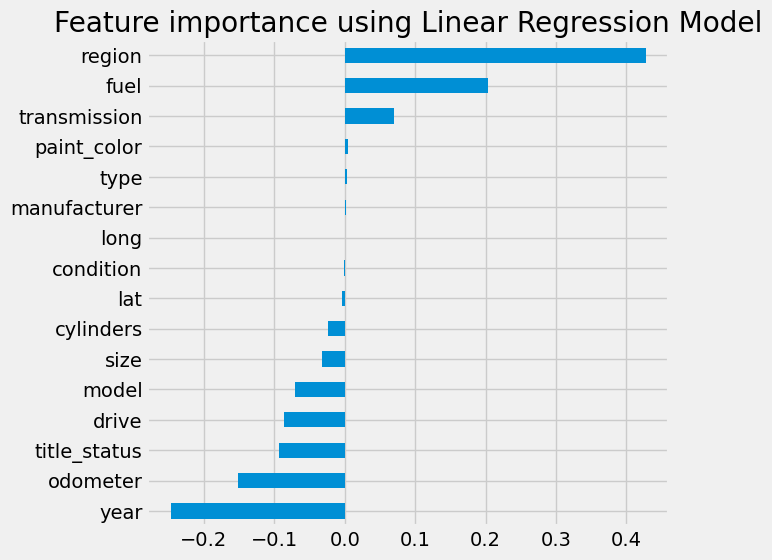

In [55]:
coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6, 6)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.show()

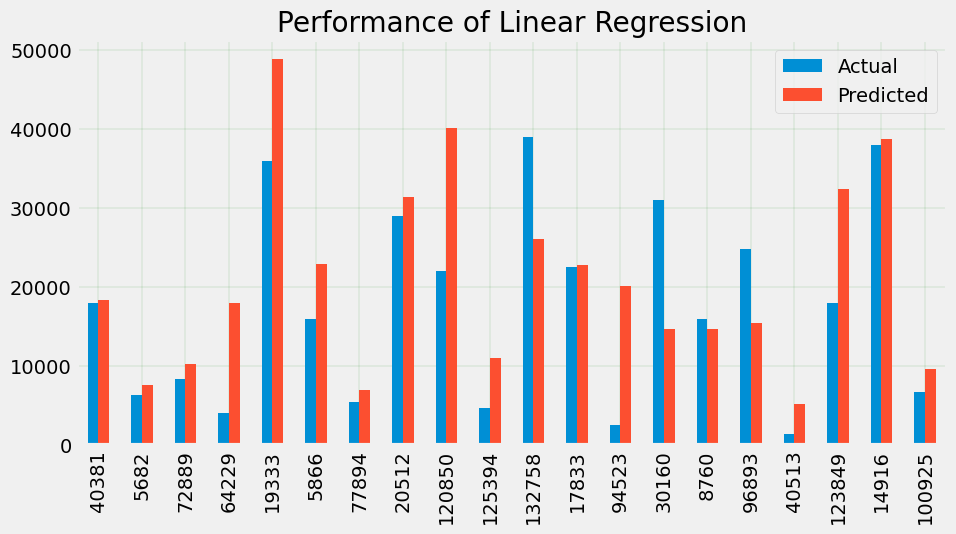

In [56]:
df_check = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.show()

#### Ridge Regeression

In [57]:
RR=Ridge(alpha=20.336)
rig_pipe = make_pipeline(tr,RR)
X_train1,X_val,y_train1,y_val = train_test_split(X_train,y_train,test_size=0.20,random_state=342)
y_train1 = np.log(y_train1)
rig_pipe.fit(X_train1,y_train1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['year', 'odometer', 'lat',
                                                   'long']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(dtype='i',
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(dtype='i',
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['region', 'model'])])),
                ('ridge', Ridge(alpha=20.336))])

In [58]:
cros_res = cross_validate(rig_pipe,X_train1,y_train1,return_train_score=True,scoring=['neg_mean_squared_log_error','neg_mean_absolute_error','r2'])

pd.DataFrame(cros_res)

,fit_time,score_time,test_neg_mean_squared_log_error,train_neg_mean_squared_log_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2
0,0.541506,0.168465,-0.002358,-0.002443,-0.370111,-0.373881,0.635414,0.627156
1,0.548201,0.132982,-0.002421,-0.002428,-0.372918,-0.373133,0.631649,0.628036
2,0.831909,0.156901,-0.002461,-0.002417,-0.373641,-0.372874,0.620339,0.630872
3,0.673800,0.119747,-0.002410,-0.002430,-0.373821,-0.372990,0.628128,0.628925
4,0.569274,0.134959,-0.002485,-0.002411,-0.375446,-0.372525,0.627424,0.629152


In [59]:
y_pred = np.exp(rig_pipe.predict(X_val))
y_pred

array([23472.05288983, 12301.74927441, 11084.61944486, ...,
        4794.30829256, 10836.30398911,  2506.11071528])

In [60]:
y_test_1,y_pred_1=remove_neg(y_val,y_pred)
r2_rig=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r2_rig[0]))
print("Root MSLE : {}".format(r2_rig[1]))
print("R2 Score : {} or {}%".format(r2_rig[2],r2_rig[3]))
accu['Ridge Regression']=r2_rig

Coefficients: 
 [ 0.42745221 -0.24681109  0.00133652 -0.07065878 -0.00052716 -0.02362763
  0.20372363 -0.15183444 -0.09328458  0.0701206  -0.08628334 -0.03270474
  0.00244341  0.00512964 -0.00441056  0.00084873]
MSLE : 0.2515613136928739
Root MSLE : 0.5015588835748739
R2 Score : 0.523707646213766 or 52.3708%


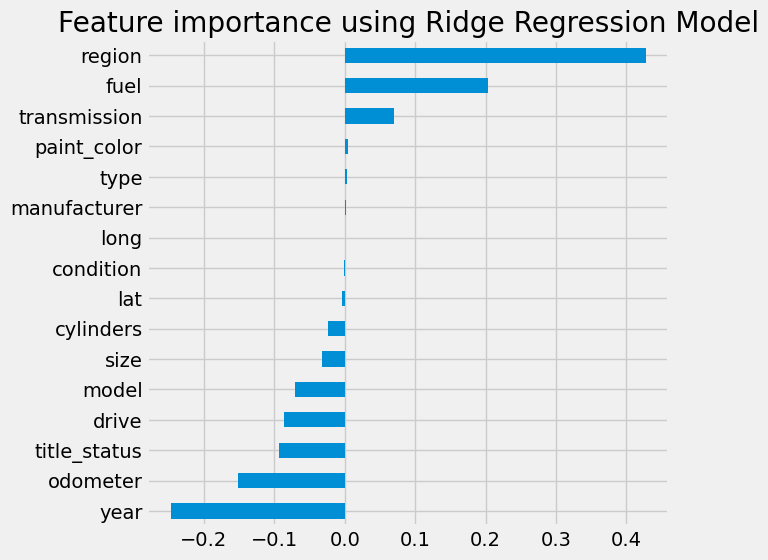

In [61]:
coef = pd.Series(RR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6, 6)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Regression Model")
plt.show()

#### knn



In [62]:
R_MSLE=[]

X_train1,X_val,y_train1,y_val = train_test_split(X_train,y_train,test_size=0.20,random_state=342)
y_train1 = np.log(y_train1)
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    knn_pipe = make_pipeline(tr,KNN)
    knn_pipe.fit(X_train1,y_train1)
    y_pred=np.exp(knn_pipe.predict(X_val))
    error=np.sqrt(mean_squared_log_error(y_val, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.47157411403681015
K = 2  , Root MSLE = 0.42984070648286654
K = 3  , Root MSLE = 0.418734450642299
K = 4  , Root MSLE = 0.41464223561601904
K = 5  , Root MSLE = 0.41114165836847966
K = 6  , Root MSLE = 0.4109603116052544
K = 7  , Root MSLE = 0.41067080933793076
K = 8  , Root MSLE = 0.4101550212508729
K = 9  , Root MSLE = 0.4113285514276554


In [91]:
KNN=KNeighborsRegressor(n_neighbors=8)
knn_pipe = make_pipeline(tr,KNN)
cross_res = cross_validate(knn_pipe,X_train,np.log(y_train),cv=6,return_train_score=True)

pd.DataFrame(cross_res)

,fit_time,score_time,test_score,train_score
0,0.409071,3.198135,0.756304,0.814083
1,0.626947,4.217908,0.748711,0.814373
2,0.556575,3.688044,0.751711,0.814276
3,0.755508,3.840114,0.755124,0.813944
4,0.706134,4.617776,0.748545,0.814670
5,0.677073,3.827556,0.754862,0.814512


In [63]:
r3_knn=result(y_val,y_pred)
print("MSLE : {}".format(r3_knn[0]))
print("Root MSLE : {}".format(r3_knn[1]))
print("R2 Score : {} or {}%".format(r3_knn[2],r3_knn[3]))
accu['KNN']=r3_knn

MSLE : 0.16919117721957333
Root MSLE : 0.4113285514276554
R2 Score : 0.7139667606598388 or 71.3967%


#### Random Forest

In [64]:
X_train1.shape,y_train1.shape

((90892, 16), (90892,))

In [65]:
X_val.shape,y_val.shape

((22724, 16), (22724,))

In [66]:
y_test.shape

(28405,)

In [67]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)

X_train1,X_val,y_train1,y_val = train_test_split(X_train,y_train,test_size=0.20,random_state=342)
y_train1 = np.log(y_train1)

rfr_pipe = make_pipeline(tr,RFR)
rfr_pipe.fit(X_train1,y_train1)
y_pred = np.exp(rfr_pipe.predict(X_val))

In [68]:
r4_rf=result(y_val,y_pred)
print("MSLE : {}".format(r4_rf[0]))
print("Root MSLE : {}".format(r4_rf[1]))
print("R2 Score : {} or {}%".format(r4_rf[2],r4_rf[3]))
accu['RandomForest Regressor']=r4_rf

MSLE : 0.08711623744261787
Root MSLE : 0.295154599223217
R2 Score : 0.8637102530483836 or 86.371%


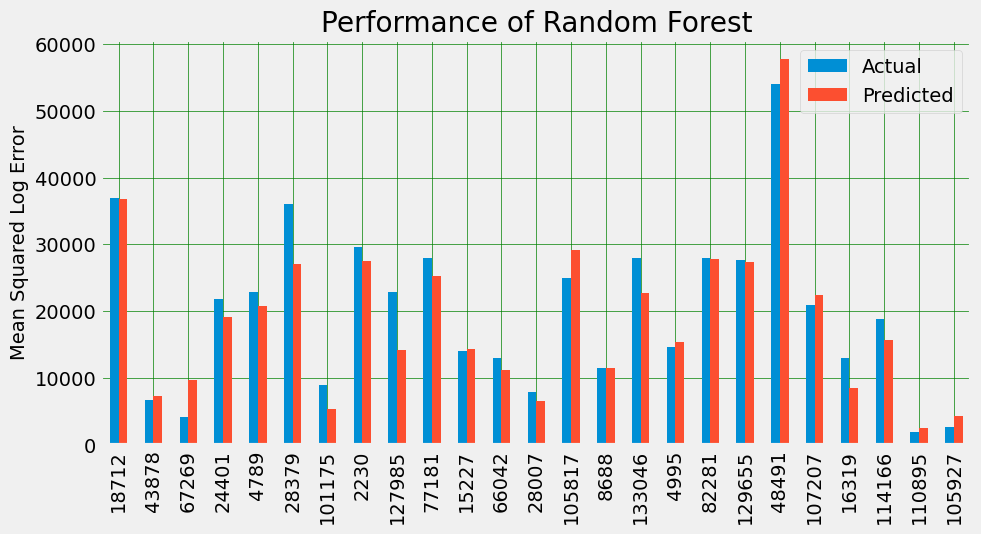

In [69]:
df_check = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.show()

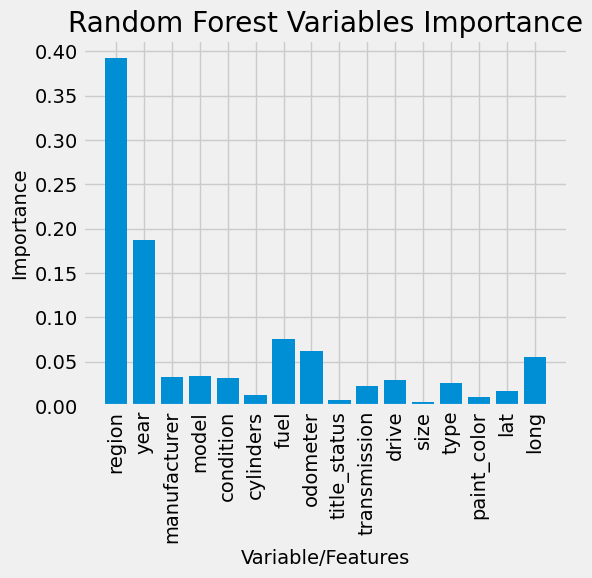

In [70]:
importances=RFR.feature_importances_
features=X_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.show();

#### Bagging Regressor

In [71]:
#model implementation
X_train1,X_val,y_train1,y_val = train_test_split(X_train,y_train,test_size=0.20,random_state=342)
y_train1 = np.log(y_train1)


baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,max_samples=1.0, max_features=1.0, bootstrap=False, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)

bag_pipe = make_pipeline(tr,baggReg)
bag_pipe.fit(X_train1,y_train1)
y_pred=np.exp(bag_pipe.predict(X_val))

r5_br=result(y_val,y_pred)
print("MSLE : {}".format(r5_br[0]))
print("Root MSLE : {}".format(r5_br[1]))
print("R2 Score : {} or {}%".format(r5_br[2],r5_br[3]))

accu['Bagging Regressor']=r5_br


MSLE : 0.17082621363739595
Root MSLE : 0.4133112793493494
R2 Score : 0.763979052888509 or 76.3979%


####  AdaBoost


In [72]:
#model implementation
X_train1,X_val,y_train1,y_val = train_test_split(X_train,y_train,test_size=0.20,random_state=342)
y_train1 = np.log(y_train1)


ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

abr_pipe = make_pipeline(tr,ABR)

abr_pipe.fit(X_train1, y_train1)
y_pred = np.exp(abr_pipe.predict(X_val))


In [73]:

#model evaluation
r6_ab=result(y_val,y_pred)
print("MSLE : {}".format(r6_ab[0]))
print("Root MSLE : {}".format(r6_ab[1]))
print("R2 Score : {} or {}%".format(r6_ab[2],r6_ab[3]))
accu['Bagging Regressor']=r6_ab


MSLE : 0.09034900522192772
Root MSLE : 0.3005811125502195
R2 Score : 0.8419386672796205 or 84.1939%


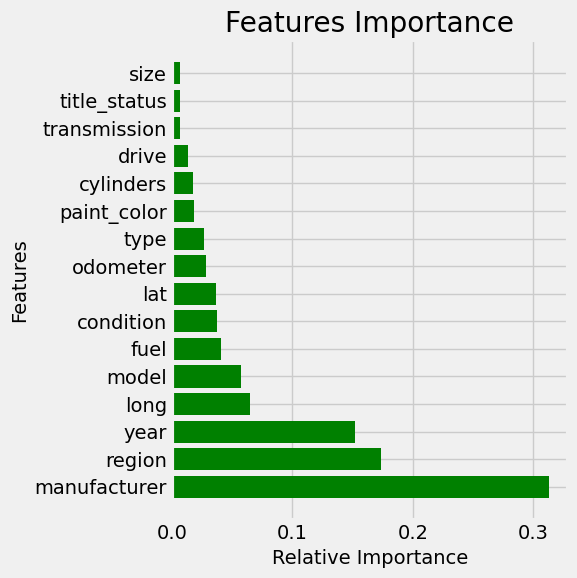

In [74]:

importances=ABR.feature_importances_
features=X_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(1)
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

#### XGBoost 

In [75]:
#model implementation and fitting data
X_train1,X_val,y_train1,y_val = train_test_split(X_train,y_train,test_size=0.20,random_state=342)
y_train1 = np.log(y_train1)



xg_reg = XGBRegressor(learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_pipe = make_pipeline(tr,xg_reg)
xg_pipe.fit(X_train1,y_train1)
y_pred = np.exp(xg_pipe.predict(X_val))


In [77]:
#model evaluation
y_test_1,y_pred_1=remove_neg(y_val,y_pred)
r7_xg=result(y_test_1,y_pred_1)
print("MSLE : {}".format(r7_xg[0]))
print("Root MSLE : {}".format(r7_xg[1]))
print("R2 Score : {} or {}%".format(r7_xg[2],r7_xg[3]))
accu['XGB Regressor']=r7_xg


MSLE : 0.0855640291335146
Root MSLE : 0.2925132973618714
R2 Score : 0.8510734636575784 or 85.1073%


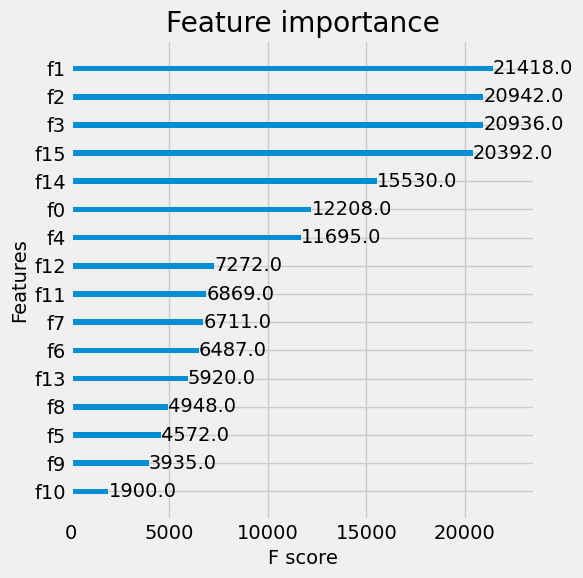

In [78]:
plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.tight_layout()
plt.show();

#### LightGBM


In [79]:
lgbm = LGBMRegressor(n_estimators=500,max_depth=7,n_jobs=-1)

X_train1,X_val,y_train1,y_val = train_test_split(X_train,y_train,test_size=0.20,random_state=342)
y_train1 = np.log(y_train1)

lgbm_pipe = make_pipeline(tr,lgbm)
lgbm_pipe.fit(X_train1,y_train1)
y_pred = np.exp(lgbm_pipe.predict(X_val))

In [80]:
a,b = X_train,np.log(y_train)
cross_rel = cross_validate(lgbm_pipe,a,b,return_train_score=True,scoring=['r2','neg_mean_squared_log_error'])

pd.DataFrame(cross_rel)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_log_error,train_neg_mean_squared_log_error
0,7.017473,0.843014,0.874748,0.901189,-0.000846,-0.000684
1,5.967615,0.809831,0.873876,0.902782,-0.000861,-0.000671
2,6.176776,0.774847,0.875058,0.902929,-0.000869,-0.000667
3,6.178822,0.874545,0.874340,0.902500,-0.000863,-0.000673
4,6.720858,0.991165,0.876652,0.902362,-0.000848,-0.000673


In [81]:
r8_rf=result(y_val,y_pred)
print("MSLE : {}".format(r8_rf[0]))
print("Root MSLE : {}".format(r8_rf[1]))
print("R2 Score : {} or {}%".format(r8_rf[2],r8_rf[3]))
accu['LGBM Regressor']=r8_rf

MSLE : 0.08434311321664217
Root MSLE : 0.2904188582317653
R2 Score : 0.8393412084747038 or 83.9341%


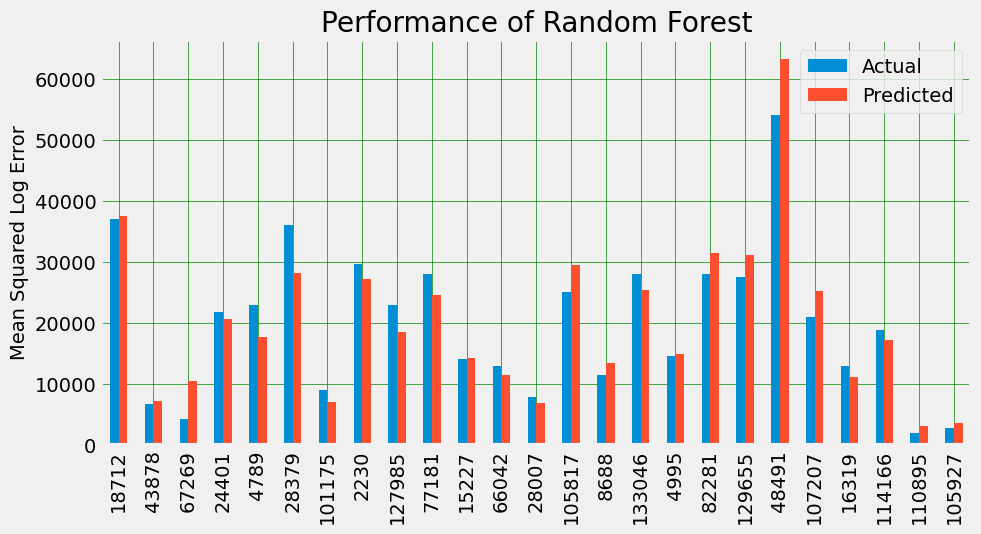

In [82]:
df_check = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.show()

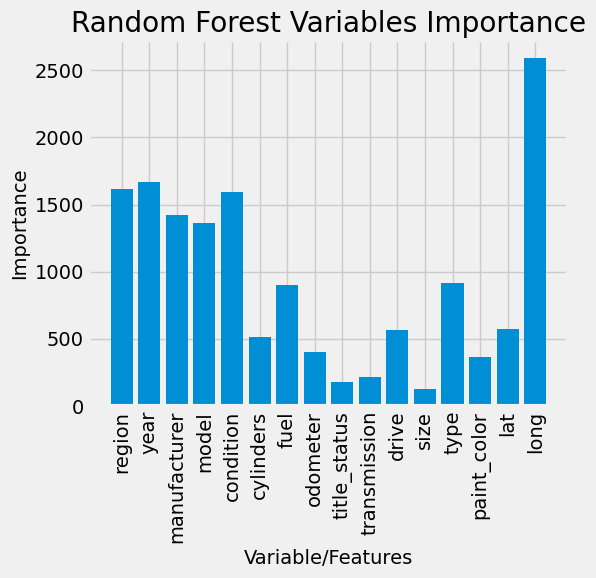

In [83]:
importances=lgbm.feature_importances_
features=X_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.show();

In [85]:
model_accuracy=accu.loc['Accuracy(%)']

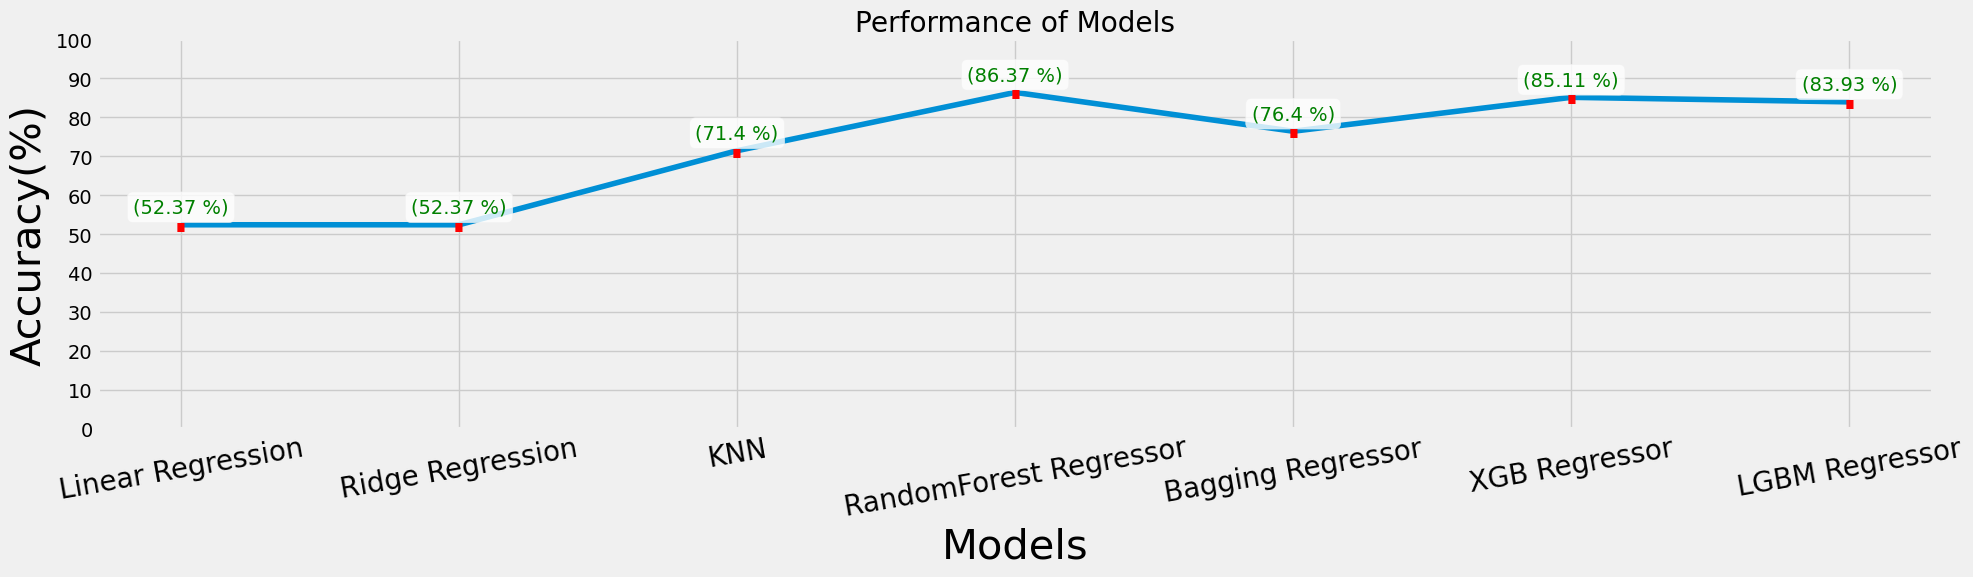

In [86]:
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.show();

## Final Model 

From above all models the random forest gives best results 

In [92]:
model = RandomForestRegressor()



rfr_pipe = make_pipeline(tr,model)
# rfr_pipe.fit(X_train,np.log(y_train))
# y_pred = np.exp(rfr_pipe.predict(X_val))

In [93]:
cross_res = cross_validate(rfr_pipe,X_train,np.log(y_train),cv=6,return_train_score=True)

pd.DataFrame(cross_res)

,fit_time,score_time,test_score,train_score
0,94.457001,0.994495,0.868417,0.981860
1,78.230094,0.974014,0.863991,0.981705
2,115.886209,1.480096,0.868419,0.981473
3,100.803531,0.971543,0.866130,0.981743
4,74.429041,0.955764,0.870051,0.981797
5,76.543838,0.943614,0.866468,0.981842
